In [1]:
import pandas as pd


In [2]:
heart_desiese = pd.read_csv('heart-disease.csv')
heart_desiese

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# divide the file data into training data and test data
x_data = heart_desiese.drop('target', axis =1)

y_labels = heart_desiese['target']

In [4]:
from sklearn.model_selection import train_test_split

x_data_training, x_data_testing , y_label_training , y_label_testing = train_test_split(x_data , y_labels , test_size = .2   )

In [5]:
#until now i just prepared the data to feed our model on it for the training process
# now we will actually train our model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
# clf.get_params();   #search: 'what is this mean and why without it the fit func not working, just try to remove it and try your code'

In [6]:
#training the model

clf.fit(x_data_training , y_label_training ); # semecolon just hide the output details

In [7]:
#testing the model
prediction = clf.predict(x_data_testing)
prediction


array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [8]:
#evaluating the model
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
# to evaluate the model we use confusion matrix or accuracy score 'both of them are defferient methods for the same perpose'
confusion_matrix(prediction , y_label_testing)

array([[21,  6],
       [ 8, 26]], dtype=int64)

In [10]:
accuracy_score(prediction , y_label_testing)


0.7704918032786885

In [11]:
#improving the model by using the hyperparameter n_estemator in the clf model

for i in range(10, 100, 10):
    clf = RandomForestClassifier(n_estimators= i).fit(x_data_training, y_label_training)
    print(f"the model when n_estemator ={i},")
    print(f"accuracey= {clf.score(x_data_testing, y_label_testing)*100:.2f}%")

the model when n_estemator =10,
accuracey= 80.33%
the model when n_estemator =20,
accuracey= 77.05%
the model when n_estemator =30,
accuracey= 80.33%
the model when n_estemator =40,
accuracey= 81.97%
the model when n_estemator =50,
accuracey= 85.25%
the model when n_estemator =60,
accuracey= 81.97%
the model when n_estemator =70,
accuracey= 81.97%
the model when n_estemator =80,
accuracey= 83.61%
the model when n_estemator =90,
accuracey= 81.97%


In [12]:
#now we need to save our model
import pickle
pickle.dump(clf, open('model1.pkl', 'wb'))

In [13]:
load_model = pickle.load(open('model1.pkl', 'rb'))
load_model.score(x_data_testing, y_label_testing)

0.819672131147541

## Converting categorical data inot numerical

In [1]:
import pandas as pd 
car_sales = pd.read_csv('dropped.csv')

x_data = car_sales.drop('Price', axis =1)
y_label = car_sales['Price']   

In [22]:
car_sales.head()


,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Honda,White,35431.0,4.0,15323.0
1,1,BMW,Blue,192714.0,5.0,19943.0
2,2,Honda,White,84714.0,4.0,28343.0
3,3,Toyota,White,154365.0,4.0,13434.0
4,4,Nissan,Blue,181577.0,3.0,14043.0


In [72]:
from sklearn.preprocessing  import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([( 'one_hot',
                                 one_hot,
                                 categorical_features)],
                                 remainder = 'passthrough'
                                )

x_transformed = transformer.fit_transform(x_data)
x_transformed

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        9.97000e+02, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.98000e+02, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.99000e+02, 2.48360e+05]])

In [73]:
pd.DataFrame(x_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,181577.0


In [74]:
#now after converting all the features we need to build our model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
model = RandomForestRegressor()
np.random.seed(40)
x_train , x_test , y_train , y_test = train_test_split(x_transformed , y_label, test_size = .3) 

model.fit(x_train, y_train)




C:\Users\mahFarag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [79]:
np.shape(y_train ), np.shape(x_train)

((570,), (570, 14))

In [61]:
model.score(x_test, y_test)

0.26061058972175266

## Dealing with missing values 

In [12]:
car_sales_missing = pd.read_csv('9.1 car-sales-extended-missing-data.csv.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [13]:
# now we need to deal with this missing values 
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [14]:
#fill every categorical column missing value by 'miising' value
car_sales_missing['Make'].fillna('missing', inplace = True)

In [15]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,missing,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [16]:
car_sales_missing.isna().sum()

Make              0
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [18]:
# Do the same for the Colour coumn
car_sales_missing['Colour'].fillna('missing', inplace = True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [20]:
car_sales_missing["Doors"].fillna(4, inplace = True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [33]:
# we can not deal with the missing values inside the 'Price' label, as it's our  target so we have to remove every single
#column have a missing Price value
car_sales_missing.dropna(inplace = True);

In [34]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [92]:
len(car_sales_missing)

950

### convert categorical to Nummbers

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
categorical_features = ['Make' , 'Colour']
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                 categorical_features
                                  )],
                                remainder = 'passthrough'        
                               )
x_transform  = transformer.fit_transform(x)
x_transform


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]])

In [94]:
pd.DataFrame(x_transform).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181577.0,3.0


In [138]:
# np.random.seed(40)
x = car_sales_missing.drop('Price' , axis = 1)
y = car_sales_missing['Price']    
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_transform , y , test_size = .2)

In [109]:
 len(x_train) , len(y_train)

(760, 760)

In [110]:
#before the training 'fit func' the shape of x_train must = the shape of y_train 'number of rows not the columns'
import numpy as np 
np.shape(x_train) , np.shape(y_train)

((760, 13), (760,))

In [159]:
#until now
# 1. we dealt with the missing values inside the Dataframe
# 2. trsafaormed the categorical data features to be numerical 

#now we are ready to build our model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100)
# np.random.seed(50)
model.fit(x_train ,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [163]:
model.score(x_train , y_train)


0.8739667385276548

In [164]:
model.score(x_test , y_test)

0.28616530683269736

In [168]:
from sklearn.metrics import confusion_matrix , accuracy_score
 
y_prediction = model.predict(x_test)
accuracy_score(y_prediction , y_test)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

## Fill missing values but now using the scikit-learn liberarie


In [36]:
import pandas as pd
car_sales_missing = pd.read_csv('9.1 car-sales-extended-missing-data.csv.csv')


In [37]:
car_sales_missing.dropna(subset = ['Price'] , inplace = True )
# len(car_sales_missing)
 
x = car_sales_missing.drop('Price' , axis = 1) 
y = car_sales_missing['Price']


In [44]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
5,Honda,Red,42652.0,4.0
6,Toyota,Blue,163453.0,4.0
7,Honda,White,NaN,4.0
8,NaN,White,130538.0,4.0
9,Honda,Blue,51029.0,4.0


In [38]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.compose  import ColumnTransformer

# i need ti make 3 types of gilling
# 1. categorical values by 'missing'
# 2. Doors feature by 4
# 3. numerical features by the mean of the column

#ao we need to prepar the func for that 
categorical_features = ['Make', 'Colour']
doors_feature = ['Doors']
numerical_feature = ['Odometer (KM)']

categorical_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
doors_imputer  = SimpleImputer (strategy = "constant" , fill_value = 4 )
numerical_imputer = SimpleImputer( strategy ="mean")

imputer = ColumnTransformer([('categorical_' , categorical_imputer, categorical_features ),
                                ('numerical_' , numerical_imputer , numerical_feature),
                                ('Doors_' , doors_imputer , doors_feature)
                                ])

x_filled = imputer.fit_transform(x)


In [50]:
pd.DataFrame(x_filled)

,0,1,2,3
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
5,Honda,Red,42652,4
6,Toyota,Blue,163453,4
7,Honda,White,130987,4
8,missing,White,130538,4
9,Honda,Blue,51029,4


In [51]:
# after that you need to convert categorical to numerical to make your computation on the DataFrame 
# and after that begin to build your model 
# it's like the steps which we make above just you need to copy it and run the code

## Model evaluation types
 1. score() func
 2. cross_val_score() func
 3. accuracy_score() func
 4. confusion_martrix() func
 5. classification report
 6. Roc_curve

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [6]:
heart_disease = pd.read_csv('10.3 heart-disease.csv.csv')

x = heart_disease.drop('target' , axis =1)
y = heart_disease['target'] 

In [7]:
from sklearn.model_selection import train_test_split
np.random.seed(40)
x_train , x_test , y_train , y_test = train_test_split(x, y) 

In [8]:
clf = RandomForestClassifier( n_estimators = 100).fit(x_train , y_train);

## 1. Socre() func

In [9]:
clf.score(x_train , y_train)

1.0

In [10]:
score_val = clf.score(x_test , y_test)
score_val

0.8552631578947368

## 2. Corss_validation


In [11]:
# passing the model 'clf' & the data & the label as a parameters 
# it returns an array of evaluation from 5 diferrent train_test splitting >it's strong than the score() 
cross_val_score = cross_val_score(clf , x , y , cv = 5)
cross_val_score

array([0.83606557, 0.86885246, 0.7704918 , 0.8       , 0.76666667])

In [12]:
#we have to take the mean of this value to exactly find the model evaluation using Cross validation
cross_val_mean = np.mean(cross_val_score)
cross_val_mean

0.8084153005464481

In [13]:
score_val , cross_val_mean
# you see the cross_val_score less than the score () but it's more dependant and descripe the data better than the score ()

(0.8552631578947368, 0.8084153005464481)

# 3. Roc_curve validation

In [14]:
from sklearn.metrics import roc_curve

y_predict = clf.predict_proba(x_test)
y_predict[:8] , len(y_predict)


(array([[0.16, 0.84],
        [0.49, 0.51],
        [0.29, 0.71],
        [0.68, 0.32],
        [0.1 , 0.9 ],
        [0.21, 0.79],
        [0.43, 0.57],
        [1.  , 0.  ]]), 76)

In [15]:
y_predict_positive = y_predict[:,1] 
y_predict_positive[:8]

array([0.84, 0.51, 0.71, 0.32, 0.9 , 0.79, 0.57, 0.  ])

In [16]:
# now we are ready to use the Roc_curve Func
# we extract the FPR , TPR to draw the ROC curve using  plt liberary
fpr , tpr , thresholds = roc_curve(y_test , y_predict_positive)


In [17]:
fpr[:8],len(fpr)

(array([0.        , 0.        , 0.        , 0.        , 0.02941176,
        0.02941176, 0.02941176, 0.02941176]), 35)

In [18]:
tpr[:8] , len(tpr)

(array([0.        , 0.02380952, 0.04761905, 0.0952381 , 0.0952381 ,
        0.19047619, 0.28571429, 0.33333333]), 35)

In [19]:
thresholds[:8] ,len(thresholds)

(array([1.99, 0.99, 0.98, 0.97, 0.95, 0.91, 0.9 , 0.89]), 35)

In [20]:
xx = [1,0,0,1,1,0,1,0,1]
yy = [1,0,0,1,0,1,0,1,1]
fp , tp ,threshold = roc_curve(xx,yy)

In [21]:
fp

array([0. , 0.5, 1. ])

In [22]:
tp

array([0. , 0.6, 1. ])

In [23]:
threshold

array([2, 1, 0])

# Plotting the Roc_ Curve

In [24]:
import matplotlib.pyplot as plt

# defining the func  which will be used to polt the roc_curve

def plot_roc_curve (fp , tp):
    plt.plot(fp,tp , color = "red" , label ="ROC")
    plt.plot([0,1] , [0 , 1] , color="blue" , linestyle = '--' , label="Guessing")
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Reciver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()
    

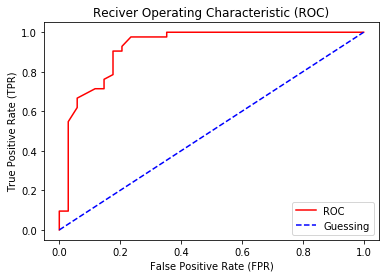

In [25]:
# it's the curve represented in a graph
plot_roc_curve(fpr , tpr)


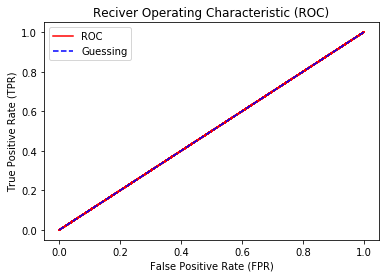

In [26]:
# the best curve
plot_roc_curve(y_test, y_test)

In [27]:
#now we have to evaluate our model using the roc_curve_score 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_predict_positive)

0.9208683473389355

# 4. Confusion matrix

In [28]:
# another method used to evaluate your model 
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, clf.predict(x_test))
conf

array([[28,  6],
       [ 5, 37]], dtype=int64)

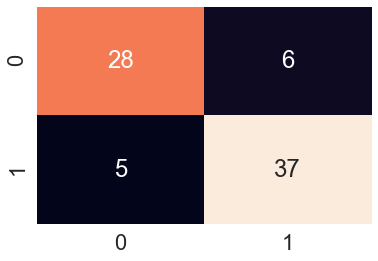

In [29]:
# using eatmapt () func  in  seaborn liberary 'built above  matplotlib' to visualize the confusion matrix values
import seaborn as sns
sns.set(font_scale= 2)
 
sns.heatmap(conf ,
           annot = True,
           cbar = False)

Text(20.5, 0.5, 'Predict labels')

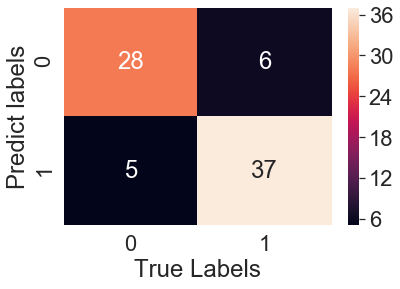

In [30]:
sns.heatmap(conf,
           annot = True,
           cbar = True)
plt.xlabel('True Labels')
plt.ylabel('Predict labels')

In [31]:
# it's a ready method for visualize confusion matric but not working ??????! Question why?
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf , x , y)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\mahFarag\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

# 5. Classification report

In [38]:
from sklearn.metrics import classification_report

# using output_dict = True to be able to put it in a DataFrame
class_report =classification_report(y_test , clf.predict(x_test) ,output_dict=True )
class_report

{'0': {'precision': 0.8484848484848485,
  'recall': 0.8235294117647058,
  'f1-score': 0.8358208955223881,
  'support': 34},
 '1': {'precision': 0.8604651162790697,
  'recall': 0.8809523809523809,
  'f1-score': 0.8705882352941177,
  'support': 42},
 'accuracy': 0.8552631578947368,
 'macro avg': {'precision': 0.8544749823819591,
  'recall': 0.8522408963585434,
  'f1-score': 0.853204565408253,
  'support': 76},
 'weighted avg': {'precision': 0.8551055227921812,
  'recall': 0.8552631578947368,
  'f1-score': 0.8550344253962386,
  'support': 76}}

In [39]:
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
f1-score,0.835821,0.870588,0.855263,0.853205,0.855034
precision,0.848485,0.860465,0.855263,0.854475,0.855106
recall,0.823529,0.880952,0.855263,0.852241,0.855263
support,34.000000,42.000000,0.855263,76.000000,76.000000


# Regression model evaluation metrics 
 1. R-aquared r2
 2. Mean Absolut Error (MAE)
 3. Mean Squared Error (MSE)

In [7]:
import pandas as pd 

car_sales = pd.read_csv( "10.3 heart-disease.csv.csv")
x = car_sales.drop('target' , axis = 1)
y = car_sales['target']

In [8]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = .2 )

In [12]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

np.random.seed(40)
model = RandomForestRegressor(n_estimators = 100).fit(x_train , y_train)

# the Default evaluation func model.score () which = the 'R-squared'
model.score(x_test , y_test )

0.38655157657657646

In [5]:
y_test_mean = np.full(len(y_test) , y_test.mean())

###  1. R-squared

In [6]:
from sklearn.metrics import r2_score

y_prediction = model.predict(x_test)

# r2_score () = score ()
r2_score(y_test , y_prediction )

0.46883747252747243

### 2. MAE
 which is the average of the abslolute diffrencies between the actaul values and the prediction

In [7]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test , y_prediction)

0.24508196721311476

In [8]:
DF = pd.DataFrame(data={'real data': y_test, 'predict': y_prediction})
DF[:10]

,real data,predict
18,1,0.74
112,1,0.35
102,1,0.58
275,0,0.06
92,1,0.90
136,1,0.86
13,1,0.73
256,0,0.00
231,0,0.01
162,1,0.97


In [9]:
DF['diffrences'] = DF['real data'] - DF['predict']

In [10]:
# if we take the average of the absolute diffrence then it will give as the MAE
DF[:10]

,real data,predict,diffrences
18,1,0.74,0.26
112,1,0.35,0.65
102,1,0.58,0.42
275,0,0.06,-0.06
92,1,0.90,0.10
136,1,0.86,0.14
13,1,0.73,0.27
256,0,0.00,0.00
231,0,0.01,-0.01
162,1,0.97,0.03


### 3. MSE

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_prediction)

0.12990000000000002

# You can pass the score Func as a parameter to the corss_val_score evaluation without calling any liberaries


##      1. Classification evaluation methods as parameter

### A. score = 'accuracy'

In [9]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(30)

clf = RandomForestClassifier(n_estimators = 100).fit(x_train , y_train)

from sklearn.model_selection import cross_val_score

score_accuracy = cross_val_score(clf , x , y , cv = 5 , scoring = 'accuracy' )
score_accuracy

array([0.83606557, 0.85245902, 0.78688525, 0.81666667, 0.78333333])

In [ ]:
print(f'{np.mean(score_accuracy) * 100:.2f} %')

### B. scoring = 'percision'

In [ ]:
score_precision = cross_val_score(clf , x , y , cv = 5 , scoring = 'precision')
score_precision

In [ ]:
print(f'{np.mean(score_precision) * 100:.2f} %')

### C. scoring = 'recall'

In [ ]:
score_recall = cross_val_score(clf , x , y , cv = 5 , scoring = 'recall')
score_recall

In [ ]:
print(f'{np.mean(score_recall) * 100:.2f} %')

### D. scoring = 'F1' 

In [ ]:
score_f1 = cross_val_score( clf , x , y , cv = 5 , scoring = 'f1' )
score_f1

In [ ]:
print(f'{np.mean(score_f1) * 100:.2f} %')

### E. jaccard

In [ ]:
score_jaccard = cross_val_score(clf , x ,y ,cv = 5 , scoring = 'jaccard')
score_jaccard

In [ ]:
print(f'{np.mean(score_jaccard) * 100:.2f} %' )

## 2. Regression model evaluation functions 

 ### A.  R-squard

In [17]:
score_r2 = cross_val_score(model , x , y , cv = 5 , scoring = 'r2')
score_r2 

array([0.        , 0.        , 0.35061796, 0.        , 0.        ])

In [18]:
print(f'{np.mean(score_r2) * 100:.2f} %')

7.01 %


### B. neg_mean_abolute_error

In [19]:
score_MAE = cross_val_score(model , x , y , cv = 5 , scoring = 'neg_mean_absolute_error')
score_MAE

In [20]:
print(f'{np.mean(score_MAE) * 100:.2f} %')

-33.81 %


### C. neg_mean_squared_error 

In [21]:
score_MSE = cross_val_score(model , x , y , cv = 5 , scoring = 'neg_mean_squared_error')
score_MSE

array([-0.16879016, -0.20577705, -0.13529016, -0.15673667, -0.27978167])

In [22]:
print(f'{np.mean(score_MSE) * 100:.2f} %')

-18.93 %


# MODEL IMPROVING USING THE HYPERPARAMETERS

In [30]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv('10.3 heart-disease.csv.csv')

# shuffling نلخبط the data before the splitting
heart_disease_shufffled  = heart_disease.sample(frac = 1)

x = heart_disease_shufffled.drop('target' , axis = 1)
y = heart_disease_shufffled['target']

x[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2


In [39]:
# now we will split the data into train , valid , test  manually instead using the train_test_split

train_ = round(.7 * len(x))
valid_ = round( train_ + .15 * len(x))

x_train , y_train = x[:train_] , y[:train_]
x_valid , y_valid = x[train_ : valid_] , y[train_ : valid_]
x_test , y_test = x[valid_ : ] , y[valid_ : ]


### FIT the model.

In [42]:
#our  data now ready for model training and evaluaton
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(x_train , y_train)


C:\Users\mahFarag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Evaluat the model 

In [40]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

def evaluat_model(y_label , y_prediction):
 
    print(f"Accuracy : {accuracy_score(y_label , y_prediction) * 100:.2f} %")
    print(f"Precision : {precision_score(y_label , y_prediction) * 100:.2f} %")
    print(f"Recall : {recall_score(y_label , y_prediction) * 100:.2f} %")
    print(f"F1 : {f1_score(y_label , y_prediction) * 100:.2f} %")
    
    

In [63]:
y_prediction = clf.predict(x_valid )

In [64]:
evaluat_model(y_valid , y_prediction)

Accuracy : 66.67 %
Precision : 76.19 %
Recall : 61.54 %
F1 : 68.09 %


## after that will will tuning the Hyperparameter to improve the Model evaluation/performance

 ### Fit the model again and change n_estimators = 100

In [65]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluat this model again

In [66]:
y_prediction_2 = clf.predict(x_valid)

In [67]:
evaluat_model(y_valid , y_prediction_2)

Accuracy : 66.67 %
Precision : 73.91 %
Recall : 65.38 %
F1 : 69.39 %


### Fit  the model again but we will change the hyperparameter n_estimators & max_depth

In [71]:
clf = RandomForestClassifier(n_estimators = 100 , max_depth = 20)
clf.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
y_prediction_3 = clf.predict(x_valid)

In [73]:
evaluat_model(y_valid , y_prediction_3)

Accuracy : 71.11 %
Precision : 76.00 %
Recall : 73.08 %
F1 : 74.51 %


## and so on for the other hyperparameters 

# Tuning the hyperparameter using the RandomizedSearchCV built in func

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(40)

heart_disease = pd.read_csv('10.3 heart-disease.csv.csv')
shuffled_heart_disease = heart_disease.sample(frac = 1)


x = shuffled_heart_disease.drop('target' , axis = 1)
y = shuffled_heart_disease['target']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .2)

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf  = RandomForestClassifier(n_jobs = 1)

In [42]:
from sklearn.model_selection import RandomizedSearchCV


   # the hyperparamter combination values
dict= {
        "n_estimators" : [10 , 100 , 200, 300 ,400 ,1000],
        "max_depth" : [None , 10 , 15 , 40 , 50],
        "max_features" : ['auto', 'sqrt'],
        "min_samples_split" : [3 , 6 , 10 , 16],
        "min_samples_leaf" : [2, 4 , 7]
        
    }

np.random.seed(55)

RSCV_clf = RandomizedSearchCV(estimator = clf,
                                    param_distributions = dict ,
                                    n_iter = 10, #number of model verisions 
                                    cv = 5 , # number of cross_validation
                                    verbose = 2)
RSCV_clf.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   0.4s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   0.3s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   0.3s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   0.4s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   0.3s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=7, max_features=sqrt, max_depth=50 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=7, max_features=sqrt, max_depth=50, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples

[CV]  n_estimators=300, min_samples_split=16, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=300, min_samples_split=16, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=16, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=300, min_samples_split=16, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=16, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=300, min_samples_split=16, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=16, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.3s finished
C:\Users\mahFarag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

# What it the best hyperparameter combinations lead to best model
   ### by the default when you use the RSCV_clf.predict ( ) it will use the best model version

In [44]:
RSCV_clf.best_params_

{'n_estimators': 300,
 'min_samples_split': 16,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [45]:
 RSCV_y_predict = RSCV_clf.predict(x_test)
     

In [46]:
evaluat_model(y_test , RSCV_y_predict)

Accuracy : 78.69 %
Precision : 81.08 %
Recall : 83.33 %
F1 : 82.19 %


# Save and load the model using pickle || joblib

# Now we will put every thing we learned together

In [1]:
import pandas as pd

car_sales = pd.read_csv('9.1 car-sales-extended-missing-data.csv.csv')
car_sales[:10]

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [2]:
# dropping the missing values inside the Price labels 
car_sales.dropna(subset =['Price'] , inplace = True)

In [3]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

categ_ = [ 'Make' , 'Colour']
Doors_ = ['Doors']
numeric_ = ['Odometer (KM)']

categ_imputer = SimpleImputer( strategy = 'constant' , fill_value = 'missing')
Doors_imputer = SimpleImputer( strategy = 'constant' , fill_value = 5)
numeric_imputer = SimpleImputer( strategy = 'mean')

imputer = ColumnTransformer([('categ' , categ_imputer , categ_),
                             ('Doors' , Doors_imputer , Doors_),
                             ('numeric' , numeric_imputer , numeric_)],
                            remainder = 'passthrough'
                              )

car_sales_filled = imputer.fit_transform(car_sales)

In [9]:
# now we filled all the missing values and our data file is ready for any computations
pd.DataFrame(car_sales_filled).isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [10]:
len(car_sales_filled)

950

In [18]:
car_sales_DF = pd.DataFrame(car_sales_filled , columns= ['Make' , 'Colour', 'Doors' ,'Odometer (KM)' , 'Price' ])
car_sales_DF[:5]

,Make,Colour,Doors,Odometer (KM),Price
0,Honda,White,4,35431,15323
1,BMW,Blue,5,192714,19943
2,Honda,White,4,84714,28343
3,Toyota,White,4,154365,13434
4,Nissan,Blue,3,181577,14043


In [19]:
car_sales_DF.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
Price            0
dtype: int64

## Converting the categorical columns into numerical values

In [20]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()

categorical_features_to_convert  = ['Make' , 'Colour']

transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features_to_convert)],
                                remainder = 'passthrough')
car_sales_transformed = transformer.fit_transform(pd.DataFrame(car_sales_DF))

In [23]:
car_sales_transformed[:5]

array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0,
        35431.0, 15323.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0,
        192714.0, 19943.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0,
        84714.0, 28343.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0,
        154365.0, 13434.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0,
        181577.0, 14043.0]], dtype=object)

In [24]:
car_sales_transformed_DF = pd.DataFrame(car_sales_transformed )

In [26]:
# converting categ to numeric increases number of columns
car_sales_transformed_DF[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1,0,0,0,0,0,0,0,1,0,4,35431,15323
1,1,0,0,0,0,0,1,0,0,0,0,5,192714,19943
2,0,1,0,0,0,0,0,0,0,1,0,4,84714,28343
3,0,0,0,1,0,0,0,0,0,1,0,4,154365,13434
4,0,0,1,0,0,0,1,0,0,0,0,3,181577,14043
5,0,1,0,0,0,0,0,0,1,0,0,4,42652,23883
6,0,0,0,1,0,0,1,0,0,0,0,4,163453,8473
7,0,1,0,0,0,0,0,0,0,1,0,4,130987,20306
8,0,0,0,0,1,0,0,0,0,1,0,4,130538,9374
9,0,1,0,0,0,0,1,0,0,0,0,4,51029,26683


In [29]:
# dividing the file into data & label to begin training the model 
from sklearn.model_selection import train_test_split

x = car_sales_transformed_DF.drop(13 , axis = 1)
y = car_sales_transformed_DF[13]


In [30]:
# DATA
x[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,0,0,0,0,0,0,1,0,4,35431
1,1,0,0,0,0,0,1,0,0,0,0,5,192714
2,0,1,0,0,0,0,0,0,0,1,0,4,84714
3,0,0,0,1,0,0,0,0,0,1,0,4,154365
4,0,0,1,0,0,0,1,0,0,0,0,3,181577


In [31]:
# Labels
y[:5]

0    15323
1    19943
2    28343
3    13434
4    14043
Name: 13, dtype: object

In [48]:
import numpy as np
np.random.seed(50)
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .2)

In [49]:
# Training the model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [50]:
y_prediction = model.predict(x_test)
y_prediction[:10]

array([17195.9 , 19956.  , 19048.68, 21662.36, 25820.9 ,  7517.1 ,
       22676.89, 15957.4 ,  6977.78, 19852.43])

In [51]:
y_test[:10]

591    16320
255    29681
353    14502
739    26308
865    26940
632     9402
565    30854
664    19453
160    22616
144    14986
Name: 13, dtype: object

In [53]:
# Model Evaluation  

model_score = model.score(x_test , y_test)
model_score

0.18005849012224406

In [56]:
from sklearn.metrics import r2_score

model_eval = r2_score(y_test , y_prediction)
model_eval

0.18005849012224406